# Load the dataframe

import pandas as pd

In [3]:
df = pd.read_csv("data-small/TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])

In [4]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


# Show certain rows

In [6]:
df[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0
15,1,35381,1860-01-16,-9,0
16,1,35381,1860-01-17,7,0
17,1,35381,1860-01-18,-6,0
18,1,35381,1860-01-19,-16,0
19,1,35381,1860-01-20,-19,0


# Show certain columns

In [7]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [8]:
df['   TG']

0          21
1          46
2          31
3          37
4          31
         ... 
59316   -9999
59317   -9999
59318   -9999
59319   -9999
59320   -9999
Name:    TG, Length: 59321, dtype: int64

In [9]:
df[['   TG', '    DATE']]

,TG,DATE
0,21,1860-01-01
1,46,1860-01-02
2,31,1860-01-03
3,37,1860-01-04
4,31,1860-01-05
...,...,...
59316,-9999,2022-05-27
59317,-9999,2022-05-28
59318,-9999,2022-05-29
59319,-9999,2022-05-30


# Simple filtering and statistics

In [11]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


In [12]:
df.loc[df['   TG'] != -9999]

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
53655,1,35381,2006-11-26,80,0
53656,1,35381,2006-11-27,70,0
53657,1,35381,2006-11-28,71,0
53658,1,35381,2006-11-29,63,0


In [14]:
df.loc[df['   TG'] != -9999]['   TG'].mean()

np.float64(63.607875261284676)

In [15]:
df.loc[df['   TG'] != -9999]['   TG'].max()

np.int64(262)

In [16]:
df.loc[df['   TG'] != -9999]['   TG'].min()

np.int64(-288)

# Get certain cells

In [21]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


In [25]:
df.loc[df['    DATE'] == "1860-01-05"]['   TG']

4    31
Name:    TG, dtype: int64

In [26]:
df.loc[df['    DATE'] == "1860-01-05"]['   TG'].squeeze()

np.int64(31)

In [29]:
df.loc[df['   TG'] == df['   TG'].max()]

,STAID,SOUID,DATE,TG,Q_TG
3150,1,35381,1868-08-16,262,0


In [30]:
df.loc[df['   TG'] == df['   TG'].max()]['    DATE']

3150   1868-08-16
Name:     DATE, dtype: datetime64[ns]

In [31]:
df.loc[df['   TG'] == df['   TG'].max()]['    DATE'].squeeze()

Timestamp('1868-08-16 00:00:00')

In [34]:
df.loc[3, '   TG'] #get by cordinates 

np.int64(37)

# Create a new column out of a existing column

In [37]:
import numpy as np
df["TG0"] = df['   TG'].mask(df['   TG'] == - 9999, np.nan)
df

,STAID,SOUID,DATE,TG,Q_TG,TG0
0,1,35381,1860-01-01,21,0,21.0
1,1,35381,1860-01-02,46,0,46.0
2,1,35381,1860-01-03,31,0,31.0
3,1,35381,1860-01-04,37,0,37.0
4,1,35381,1860-01-05,31,0,31.0
...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN
59317,1,35381,2022-05-28,-9999,9,NaN
59318,1,35381,2022-05-29,-9999,9,NaN
59319,1,35381,2022-05-30,-9999,9,NaN


# Plotting

<Axes: >

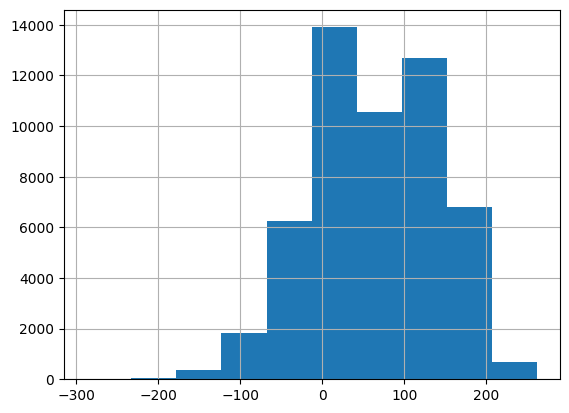

In [40]:
df['TG0'].hist()

<Axes: xlabel='    DATE'>

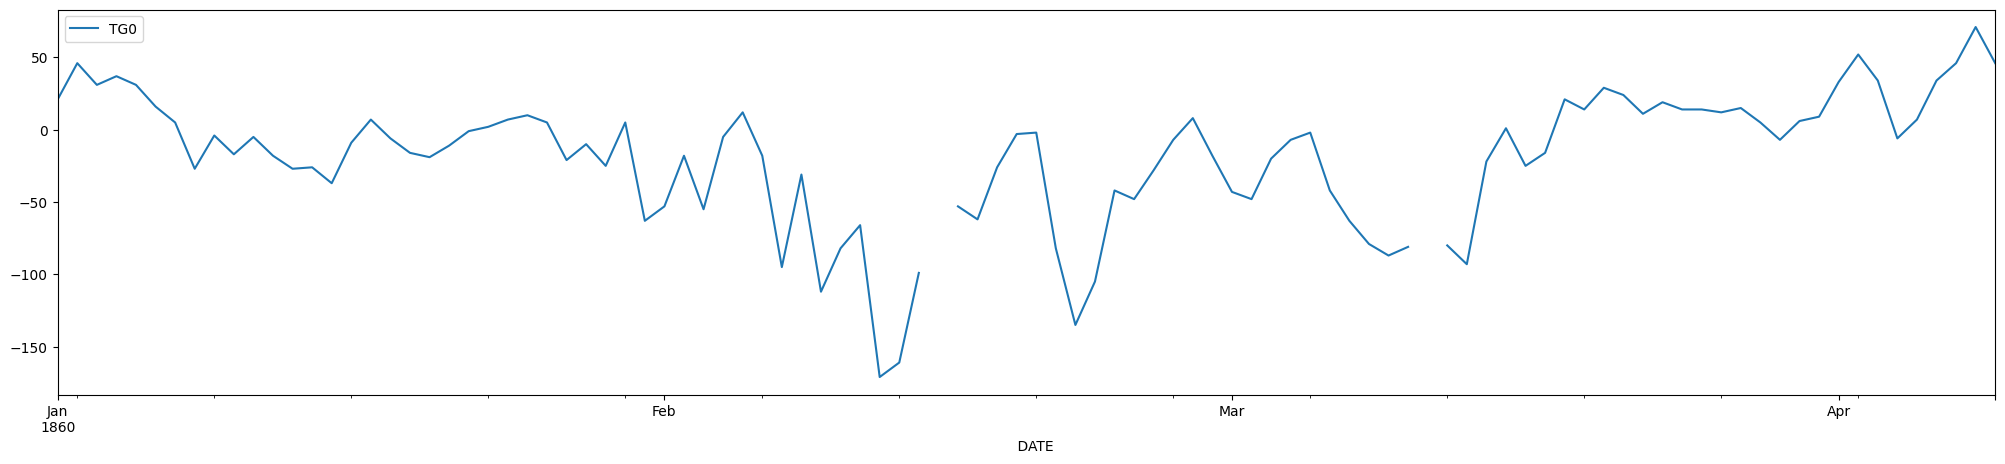

In [48]:
df[:100].plot(x = '    DATE', y = 'TG0', figsize=(25, 5))